In [ ]:
!pip install prophet


In [ ]:
import pandas as pd

# Cambia el nombre si tu archivo tiene un nombre diferente
df = pd.read_csv("/content/Dataa.csv", encoding='latin-1')

# Crear columna de fecha tipo datetime
df["Fecha"] = pd.to_datetime(df["Año"].astype(str) + "-" + df["Mes"].astype(str) + "-01")
df_prophet = df[["Fecha", "Anomalia"]].rename(columns={"Fecha": "ds", "Anomalia": "y"})


DEBUG:cmdstanpy:input tempfile: /tmp/tmp6jjtpmdg/p6l42_02.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6jjtpmdg/v6ps3u1t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49666', 'data', 'file=/tmp/tmp6jjtpmdg/p6l42_02.json', 'init=/tmp/tmp6jjtpmdg/v6ps3u1t.json', 'output', 'file=/tmp/tmp6jjtpmdg/prophet_model45_hag0u/prophet_model-20250523191840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:18:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:18:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


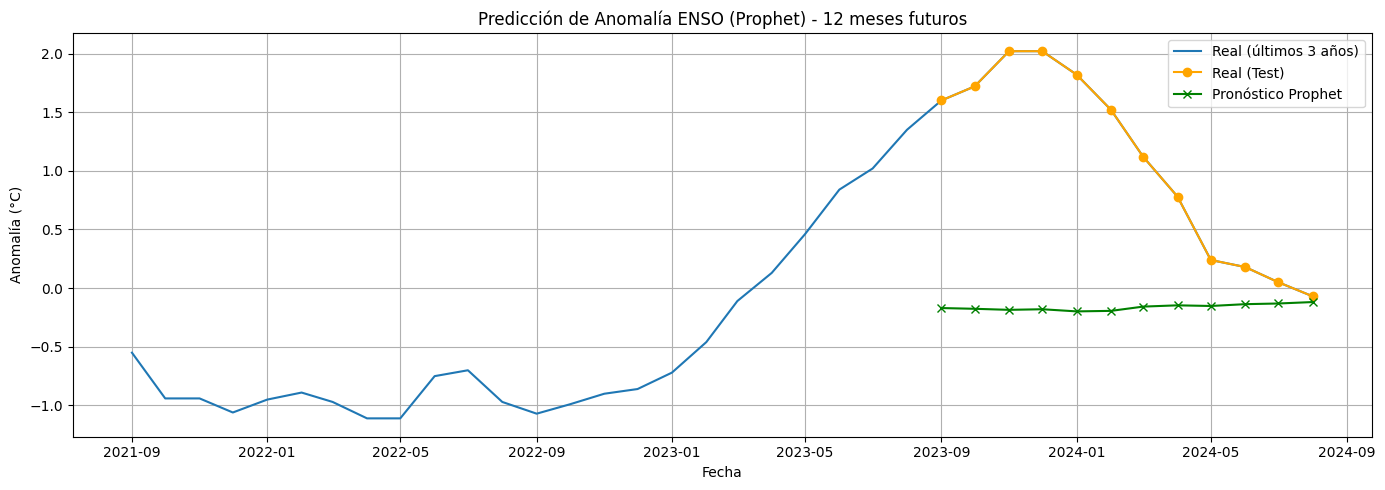

,ds,y,Pronosticado,Error absoluto
0,2023-09-01,1.60,-0.169613,1.769613
1,2023-10-01,1.72,-0.175951,1.895951
2,2023-11-01,2.02,-0.184903,2.204903
3,2023-12-01,2.02,-0.179796,2.199796
4,2024-01-01,1.82,-0.198081,2.018081
5,2024-02-01,1.52,-0.193653,1.713653
6,2024-03-01,1.12,-0.157304,1.277304
7,2024-04-01,0.78,-0.146428,0.926428
8,2024-05-01,0.24,-0.151995,0.391995
9,2024-06-01,0.18,-0.136535,0.316535


In [ ]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Separar entrenamiento y test (últimos 12 meses)
train_prophet = df_prophet.iloc[:-12]
test_prophet = df_prophet.iloc[-12:]

# Crear y ajustar el modelo Prophet
model_prophet = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
model_prophet.fit(train_prophet)

# Predecir los próximos 12 meses
future = model_prophet.make_future_dataframe(periods=12, freq="MS")
forecast_prophet = model_prophet.predict(future)

# Tomar solo las predicciones para los próximos 12 meses
forecast_last12 = forecast_prophet.iloc[-12:][["ds", "yhat"]].reset_index(drop=True)
test_prophet = test_prophet.reset_index(drop=True)

# Comparar con los datos reales
comparacion_prophet = test_prophet.copy()
comparacion_prophet["Pronosticado"] = forecast_last12["yhat"]
comparacion_prophet["Error absoluto"] = (comparacion_prophet["y"] - comparacion_prophet["Pronosticado"]).abs()

# Graficar comparación Prophet
plt.figure(figsize=(14,5))
plt.plot(df_prophet["ds"][-36:], df_prophet["y"][-36:], label="Real (últimos 3 años)")
plt.plot(comparacion_prophet["ds"], comparacion_prophet["y"], marker='o', color="orange", label="Real (Test)")
plt.plot(comparacion_prophet["ds"], comparacion_prophet["Pronosticado"], marker='x', color="green", label="Pronóstico Prophet")
plt.title("Predicción de Anomalía ENSO (Prophet) - 12 meses futuros")
plt.xlabel("Fecha")
plt.ylabel("Anomalía (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar tabla de comparación Prophet
comparacion_prophet
